In [1]:
#import libraries
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os

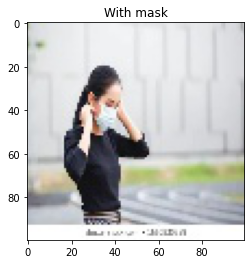

In [2]:
#sample images
filenames = (os.listdir("../input/face-mask-detection-data/with_mask"))
for i in filenames:
    img = plt.imread("../input/face-mask-detection-data/with_mask/"+i)
    plt.imshow(img)
    plt.title("With mask")
    break

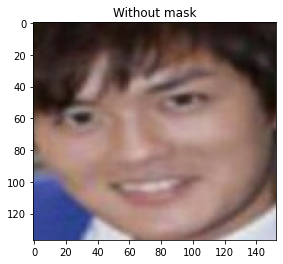

In [3]:
#sample images
filenames = (os.listdir("../input/face-mask-detection-data/without_mask"))
for i in filenames:
    img = plt.imread("../input/face-mask-detection-data/without_mask/"+i)
    plt.imshow(img)
    plt.title("Without mask")
    break

In [4]:
#read images from the dataset
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray
from PIL import Image
x = []
y = []
filenames = (os.listdir("../input/face-mask-detection-data/with_mask"))
for i in filenames:
    photo = load_img("../input/face-mask-detection-data/with_mask/"+i, target_size=(128,128))
    photo = img_to_array(photo)
    x.append(photo)
    y.append(1) # 1 with mask
filenames = (os.listdir("../input/face-mask-detection-data/without_mask"))
for i in filenames:
    photo = load_img("../input/face-mask-detection-data/without_mask/"+i, target_size=(128,128))
    photo = img_to_array(photo)
    x.append(photo)
    y.append(0) # 0 without mask
x = asarray(x)

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [5]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
#import CNN libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D

In [7]:
print(x_train.shape, x_test.shape) 

(2874, 128, 128, 3) (959, 128, 128, 3)


In [8]:
#convert dependent variable to categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
#normalize data
x_train = x_train/255.0
x_test =  x_test/255.0

In [10]:
#build CNN model
num_classes = 2
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(128,128,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)      

In [12]:
#train model with training set
model_train = model.fit(x_train, y_train, batch_size=64,epochs=20,verbose=1,validation_split=0.20)

Train on 2299 samples, validate on 575 samples
Epoch 1/20
2299/2299 [==============================] - 5s 2ms/step - loss: 0.4351 - accuracy: 0.7995 - val_loss: 0.1833 - val_accuracy: 0.9357
Epoch 2/20
2299/2299 [==============================] - 1s 539us/step - loss: 0.1885 - accuracy: 0.9369 - val_loss: 0.1530 - val_accuracy: 0.9443
Epoch 3/20
2299/2299 [==============================] - 1s 557us/step - loss: 0.1340 - accuracy: 0.9569 - val_loss: 0.1758 - val_accuracy: 0.9409
Epoch 4/20
2299/2299 [==============================] - 1s 592us/step - loss: 0.1210 - accuracy: 0.9552 - val_loss: 0.1547 - val_accuracy: 0.9391
Epoch 5/20
2299/2299 [==============================] - 1s 615us/step - loss: 0.0802 - accuracy: 0.9682 - val_loss: 0.1078 - val_accuracy: 0.9722
Epoch 6/20
2299/2299 [==============================] - 1s 602us/step - loss: 0.0558 - accuracy: 0.9787 - val_loss: 0.1074 - val_accuracy: 0.9652
Epoch 7/20
2299/2299 [==============================] - 1s 543us/step - loss: 0

In [13]:
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
preds = model.predict(x_test, verbose=1)
print("Accuracy score: ",accuracy_score(y_test, np.round_(preds)))
print("Classification report:")
print(classification_report(y_test, np.round_(preds)))

959/959 [==============================] - 0s 319us/step
Accuracy score:  0.9645464025026069
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       460
           1       0.96      0.97      0.97       499

   micro avg       0.96      0.96      0.96       959
   macro avg       0.96      0.96      0.96       959
weighted avg       0.96      0.96      0.96       959
 samples avg       0.96      0.96      0.96       959



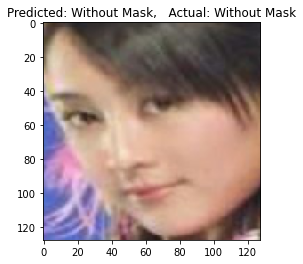

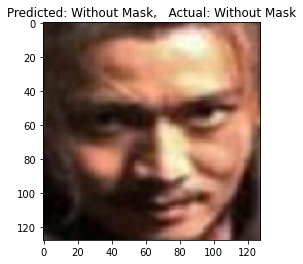

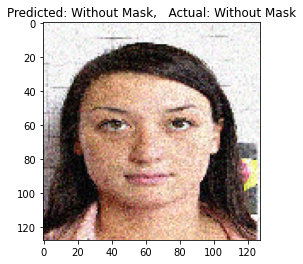

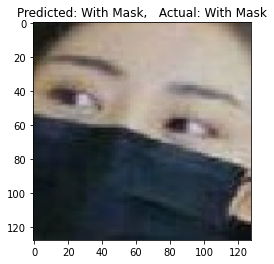

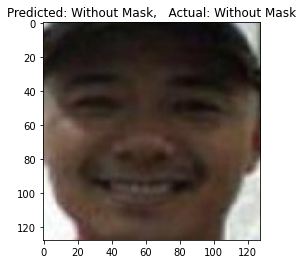

In [14]:
#results
%matplotlib inline
import random
res = ["Without Mask","With Mask"]
for i in range(5):
    plt.figure()
    im = random.randint(1,958)
    plt.imshow(x_test[im])
    plt.title("Predicted: {},   Actual: {}".format(res[np.argmax(preds[im])], res[np.argmax(y_test[im])]))

Accuracy of the model found to be **0.9635036496350365**

In [15]:
#for future use save the model
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))